# Imports & globals

In [2]:
import sys
sys.path.append("/home/cbarkhof/fall-2021")

In [3]:
from analysis_run_postprocessing.general_postprocessing_steps import *

%config InlineBackend.figure_format='retina'
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

DEVICE = "cuda:0"
EXPORT_DIR = f"{CODE_DIR}/analysis_run_postprocessing/run_postprocess_files"
EVALUATION_RESULT_FILE = "evaluation-results.pt"

# Fetch relevant runs

In [4]:
prefixes = ["(mdr-vae-exp 8 oct)", "(fb-vae-exp 8 oct) ", 
            "(beta-vae-exp 6 oct) ", "(inf-vae-exp 5 oct) ", 
            "(5-jan ptb-test)", "(4-jan ptb-test)"]

run_df = make_run_overview_df(prefixes)
run_df

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa,INFO-VAE,1,ptb,language,0,0,0,10,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=1.0, l_2_mm..."
...,...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,bmnist,image,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,bmnist,image,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ..."
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,bmnist,image,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l..."
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,bmnist,image,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2..."


# Check whether there are evaluation results missing

In [5]:
missing_df = overview_of_missing_analysis(run_df)
missing_df.sum()

dir                0
surprisal_data     0
encode             0
samples           33
cond_samples      33
evaluation         0
dtype: int64

In [6]:
missing_df = run_df.join(missing_df, on="run_name")
missing_df

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name,dir,surprisal_data,encode,samples,cond_samples,evaluation
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm...",False,False,False,False,False,False
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa,INFO-VAE,1,ptb,language,0,0,0,10,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=1.0, l_2_mm...",False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,bmnist,image,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l...",False,False,False,True,True,False
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,bmnist,image,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ...",False,False,False,True,True,False
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,bmnist,image,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l...",False,False,False,True,True,False
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,bmnist,image,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2...",False,False,False,True,True,False


# Gather all the evaluation results

In [7]:
all_results = dict()

for idx, row in missing_df[missing_df.evaluation == False].iterrows():
    
    save_dir = f"{EXPORT_DIR}/{row.run_name}"
    result_file = f"{save_dir}/{EVALUATION_RESULT_FILE}"
    
    if os.path.exists(result_file):
        res = torch.load(result_file)
        
        for phase, phase_res in res.items():
            
            all_results[(idx, phase)] = dict()
            
            for k in sorted(list(phase_res.keys())):
                if " mean" in k:
                    var_name = k.split(" mean")[0]
                    
                    all_results[(idx, phase)][var_name] = phase_res[k]
            
            #all_results[(idx, phase)]["run_name"] = row.run_name
                    
results_df = pd.DataFrame(all_results).transpose()
results_df = results_df.reset_index(level=1).rename({"level_1":"phase"}, axis=1)
results_df.head()

I0110 17:20:09.399344 22930776235776 utils.py:145] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
I0110 17:20:09.400875 22930776235776 utils.py:157] NumExpr defaulting to 8 threads.


,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,std_across_x_scale,std_across_z_mean,std_across_z_scale
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,test,-153.543872,0.000122,0.002958,136.444890,-158.265181,21.820290,0.003869,0.758269,0.356910,0.037580,0.545682,0.396722
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,valid,-152.013220,0.000155,0.003122,136.068936,-157.951697,21.882761,0.020147,0.758552,0.348643,0.035968,0.538280,0.398250
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,train,NaN,0.000098,NaN,131.047330,-153.131761,22.084430,-0.005843,0.756893,0.354952,0.036876,0.547138,0.397536
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,test,-99.954301,0.000349,0.023003,76.031745,-104.032034,28.000288,-0.006067,0.614176,0.632770,0.061182,0.743995,0.385637
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,valid,-99.529459,0.000370,0.022468,77.500460,-105.342155,27.841694,-0.013231,0.613299,0.623523,0.060217,0.737384,0.384854


# Merge with the hyper parameters

In [8]:
results_df['hyper params'] = results_df.index.map(run_df.transpose().to_dict())
results_df = pd.concat([results_df, results_df['hyper params'].apply(pd.Series)], axis=1)
results_df.head()

,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,...,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,test,-153.543872,0.000122,0.002958,136.444890,-158.265181,21.820290,0.003869,0.758269,0.356910,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,valid,-152.013220,0.000155,0.003122,136.068936,-157.951697,21.882761,0.020147,0.758552,0.348643,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,train,NaN,0.000098,NaN,131.047330,-153.131761,22.084430,-0.005843,0.756893,0.354952,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,test,-99.954301,0.000349,0.023003,76.031745,-104.032034,28.000288,-0.006067,0.614176,0.632770,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,valid,-99.529459,0.000370,0.022468,77.500460,-105.342155,27.841694,-0.013231,0.613299,0.623523,...,INFO-VAE,0.1,ptb,language,0.0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."


In [9]:
results_df.to_csv("global_stats.csv")

# Columns present to plot

In [10]:
for i, c in enumerate(results_df.columns):
    print(i, c)

0 phase
1 IW LL
2 MMD
3 PPL
4 distortion
5 elbo
6 kl_prior_post
7 mean_mean
8 mean_scale
9 std_across_x_mean
10 std_across_x_scale
11 std_across_z_mean
12 std_across_z_scale
13 hyper params
14 objective
15 l_rate
16 dataset
17 image_or_language
18 beta_beta
19 free_bits
20 mdr_value
21 l_mmd
22 decoder
23 run_name


# Plots

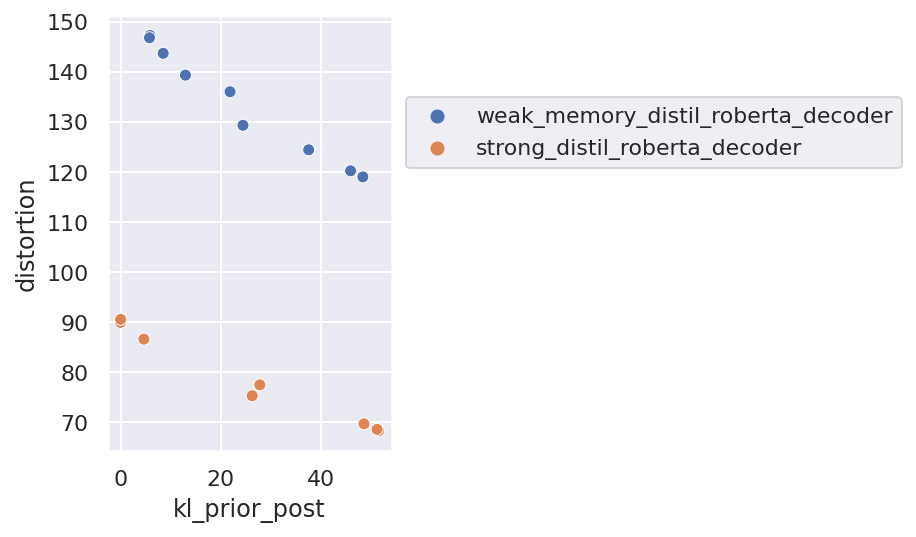

In [14]:
data = results_df[(results_df.phase == "valid") & (results_df.image_or_language == 'language')]

sns.scatterplot(
    x="kl_prior_post", 
    y="distortion", 
    hue="decoder", 
    data=data) 

plt.legend(loc=(1.05, 0.65))
plt.gca().set_aspect("equal")

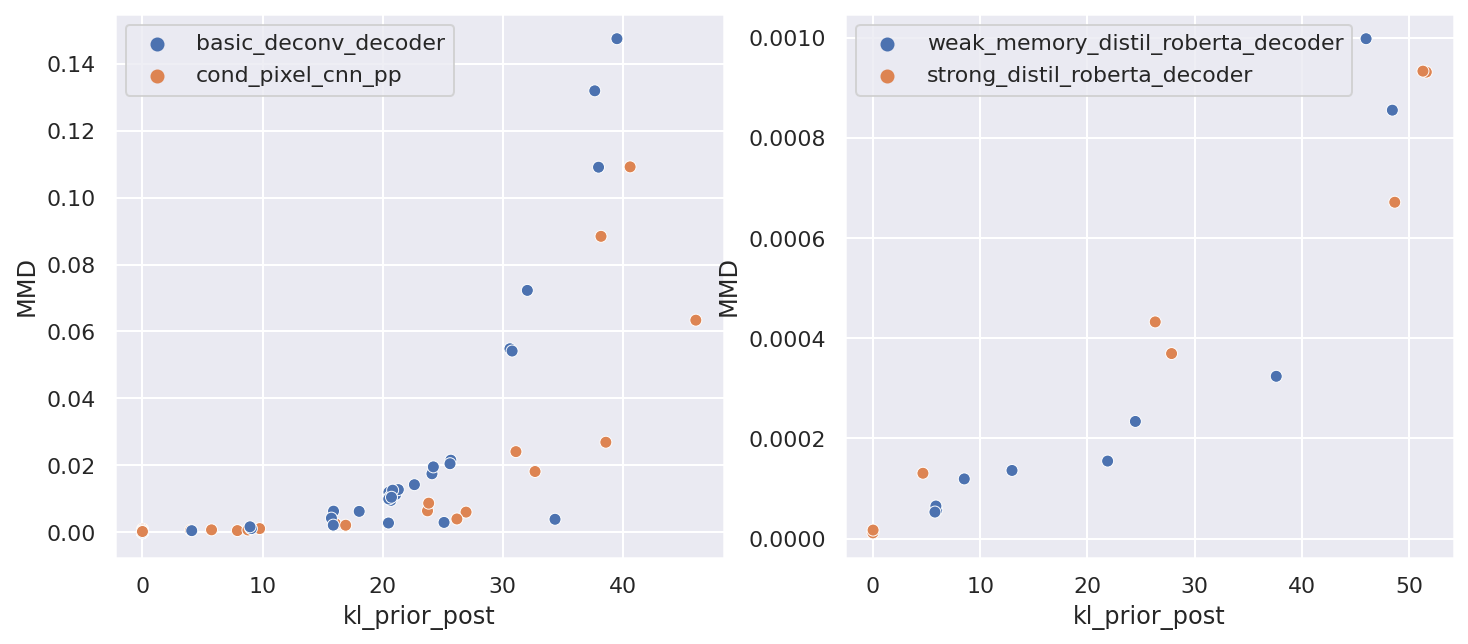

In [19]:
data = results_df[(results_df.phase == "valid")]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, (image_or_language, group_df) in enumerate(data.groupby("image_or_language")):
    sns.scatterplot(
        x="kl_prior_post", 
        y="MMD", 
        hue="decoder", 
        data=group_df, ax=axs[i]) 

    axs[i].legend()

plt.show()
# plt.gca().set_aspect("equal")

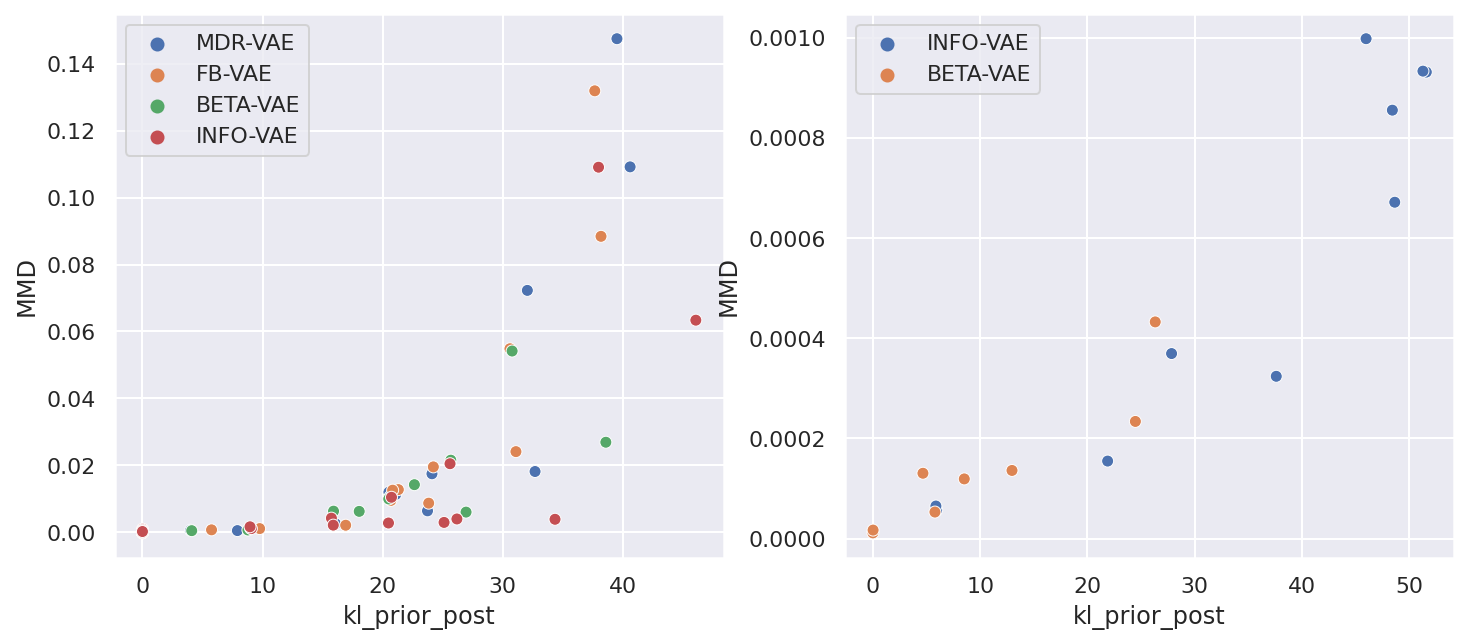

In [20]:
data = results_df[(results_df.phase == "valid")]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, (image_or_language, group_df) in enumerate(data.groupby("image_or_language")):
    sns.scatterplot(
        x="kl_prior_post", 
        y="MMD", 
        hue="objective", 
        data=group_df, ax=axs[i]) 

    axs[i].legend()

plt.show()

/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'image')

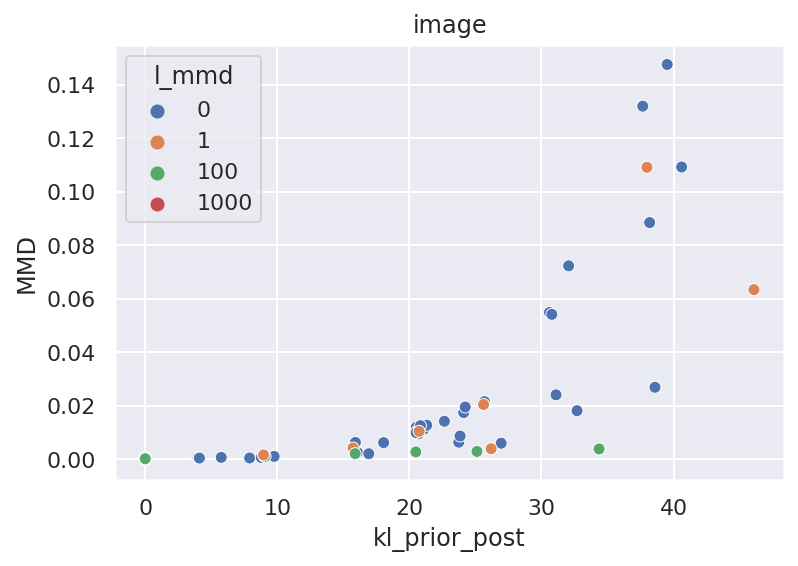

In [27]:
data = results_df[(results_df.phase == "valid") & (results_df.image_or_language == "image")]
data["l_mmd"] = data["l_mmd"].astype(str).copy()

sns.scatterplot(
        x="kl_prior_post", 
        y="MMD", 
        hue="l_mmd", 
        data=data) 

plt.title("image")


/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cbarkhof/.conda

Text(0.5, 1.0, 'language')

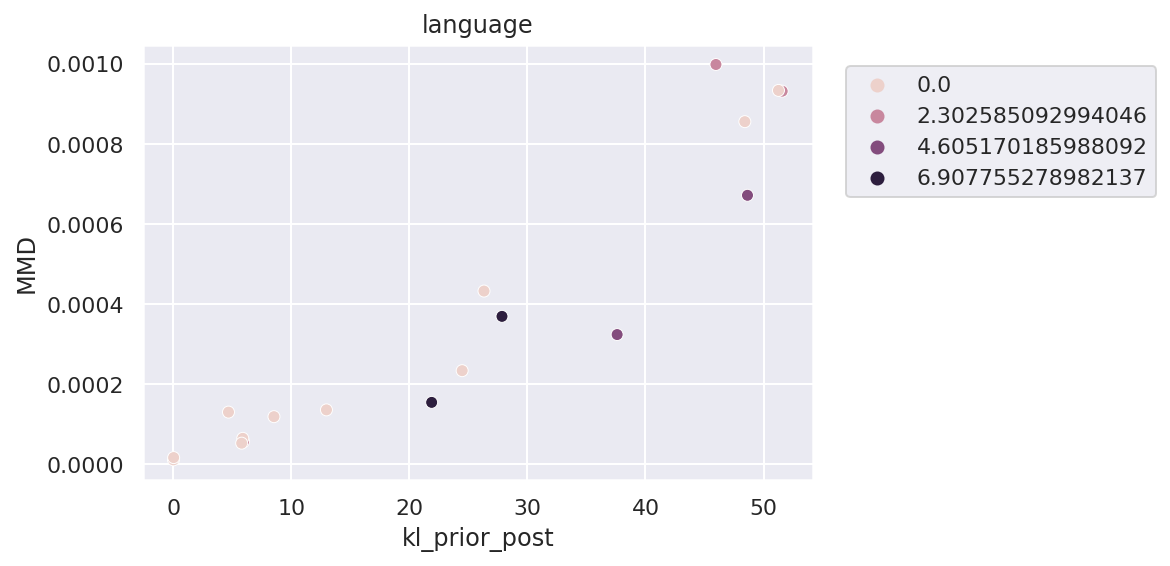

In [37]:
data = results_df[(results_df.phase == "valid") & (results_df.image_or_language == "language")]
data["log_l_mmd"] = np.log(data["l_mmd"])
data["log_l_mmd"][data["l_mmd"] == 0] = 0

sns.scatterplot(
        x="kl_prior_post", 
        y="MMD",  
        hue="log_l_mmd",
        data=data) 

# for idx, row in data.iterrows():
#     plt.annotate(f"{row.l_rate}-{row.l_mmd}", xy=(row.kl_prior_post, row.MMD), size=8)

plt.legend(loc=(1.05, 0.65))
plt.title("language")


/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cbarkhof/.conda

Text(0.5, 1.0, 'image')

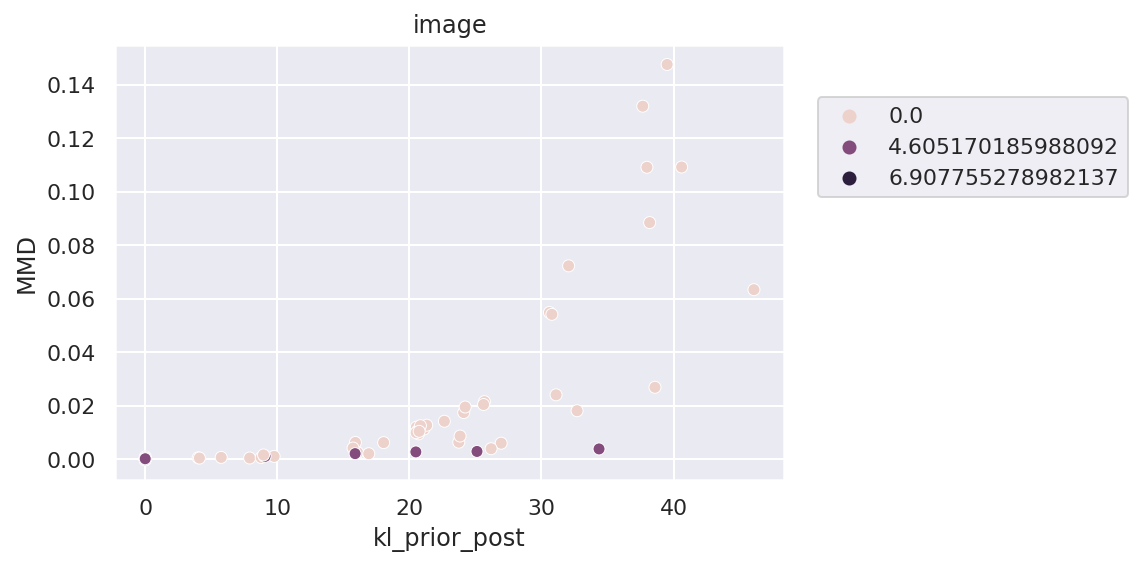

In [36]:
data = results_df[(results_df.phase == "valid") & (results_df.image_or_language == "image")]
data["log_l_mmd"] = np.log(data["l_mmd"])
data["log_l_mmd"][data["l_mmd"] == 0] = 0

sns.scatterplot(
        x="kl_prior_post", 
        y="MMD",  
        hue="log_l_mmd",
        data=data) 

# for idx, row in data.iterrows():
#     plt.annotate(f"{row.l_rate}-{row.l_mmd}", xy=(row.kl_prior_post, row.MMD), size=8)

plt.legend(loc=(1.05, 0.65))
plt.title("image")

In [25]:
data = results_df[(results_df.phase == "valid") \
                  & (results_df.image_or_language == "image") \
                  & (results_df.objective == "INFO-VAE")]

# data["MMD"] *= 1000
data["MMD"] = data["MMD"].round(5)

data = data[["l_rate", "l_mmd", "kl_prior_post", "MMD", "distortion", "decoder"]].sort_values(["kl_prior_post", "MMD"])
# data = data[""]
data.sort_values(["l_rate", "l_mmd"])


for l_rate in [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]:
    for l_mmd in [1, 10, 100]:
        for decoder in ["basic_deconv_decoder", "cond_pixel_cnn_pp"]:
            if len(data[(data.l_mmd == l_mmd) & (data.l_rate == l_rate) & (data.decoder == decoder)]) == 0:
                
                print("l_rate", l_rate, "l_mmd", l_mmd, "decoder", decoder)
    
# data[data.decoder == "weak_memory_distil_roberta_decoder"]

data

l_rate 0.1 l_mmd 10 decoder basic_deconv_decoder
l_rate 0.1 l_mmd 10 decoder cond_pixel_cnn_pp
l_rate 0.5 l_mmd 10 decoder basic_deconv_decoder
l_rate 0.5 l_mmd 10 decoder cond_pixel_cnn_pp
l_rate 1.0 l_mmd 10 decoder basic_deconv_decoder
l_rate 1.0 l_mmd 10 decoder cond_pixel_cnn_pp
l_rate 2.0 l_mmd 10 decoder basic_deconv_decoder
l_rate 2.0 l_mmd 10 decoder cond_pixel_cnn_pp
l_rate 5.0 l_mmd 10 decoder basic_deconv_decoder
l_rate 5.0 l_mmd 10 decoder cond_pixel_cnn_pp
l_rate 10.0 l_mmd 1 decoder basic_deconv_decoder
l_rate 10.0 l_mmd 1 decoder cond_pixel_cnn_pp
l_rate 10.0 l_mmd 10 decoder basic_deconv_decoder
l_rate 10.0 l_mmd 10 decoder cond_pixel_cnn_pp
l_rate 10.0 l_mmd 100 decoder basic_deconv_decoder
l_rate 10.0 l_mmd 100 decoder cond_pixel_cnn_pp


/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,l_rate,l_mmd,kl_prior_post,MMD,distortion,decoder
INFO-VAE l_Rate 100 l_MMD 1 dec: CNN.T,100.0,1,0.000002,0.00026,206.253363,basic_deconv_decoder
INFO-VAE l_Rate 1000 l_MMD 1 dec: PixelCNN++,1000.0,1,0.000002,0.00004,80.620408,cond_pixel_cnn_pp
INFO-VAE l_Rate 100 l_MMD 1 dec: PixelCNN++,100.0,1,0.000002,-0.00016,80.915839,cond_pixel_cnn_pp
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,1000.0,1,0.000006,-0.00015,206.182555,basic_deconv_decoder
INFO-VAE l_Rate 1000 l_MMD 100 dec: CNN.T,1000.0,100,0.000018,-0.00006,206.284025,basic_deconv_decoder
INFO-VAE l_Rate 1000 l_MMD 100 dec: PixelCNN++,1000.0,100,0.000040,0.00021,80.630555,cond_pixel_cnn_pp
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,100.0,100,0.000059,-0.00010,206.392230,basic_deconv_decoder
INFO-VAE l_Rate 1000 l_MMD 1000 dec: PixelCNN++,1000.0,1000,0.000125,0.00037,80.899578,cond_pixel_cnn_pp
INFO-VAE l_Rate 1000 l_MMD 1000 dec: CNN.T,1000.0,1000,0.000163,-0.00020,206.341177,basic_deconv_decoder
INFO-VAE l_Rate 5 l_MMD 1 dec: PixelCNN++,5.0,1,0.000189,0.00006,80.715502,cond_pixel_cnn_pp


In [24]:
data = results_df[(results_df.phase == "valid") \
                  & (results_df.image_or_language == "image") \
                  & (results_df.objective == "BETA-VAE")]

data["MMD"] = data["MMD"].round(5)

data = data[["beta_beta", "kl_prior_post", "MMD", "distortion", "decoder"]].sort_values(["beta_beta"])
data

/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,beta_beta,kl_prior_post,MMD,distortion,decoder
BETA-VAE beta 0.25 dec: CNN.T,0.25,30.787871,0.05416,67.964394,basic_deconv_decoder
BETA-VAE beta 0.25 dec: PixelCNN++,0.25,38.595227,0.02690,51.773409,cond_pixel_cnn_pp
BETA-VAE beta 0.5 dec: CNN.T,0.50,25.681770,0.02154,69.594771,basic_deconv_decoder
BETA-VAE beta 0.5 dec: PixelCNN++,0.50,26.951607,0.00601,57.923014,cond_pixel_cnn_pp
BETA-VAE beta 0.75 dec: CNN.T,0.75,22.650012,0.01421,70.884944,basic_deconv_decoder
BETA-VAE beta 0.75 dec: PixelCNN++,0.75,8.784885,0.00067,72.034364,cond_pixel_cnn_pp
BETA-VAE beta 1 dec: PixelCNN++,1.00,0.000660,0.00004,80.663115,cond_pixel_cnn_pp
BETA-VAE beta 1 dec: CNN.T,1.00,20.515544,0.00994,72.654161,basic_deconv_decoder
BETA-VAE beta 1.5 dec: PixelCNN++,1.50,0.000091,-0.00007,80.745332,cond_pixel_cnn_pp
BETA-VAE beta 1.5 dec: CNN.T,1.50,18.052255,0.00623,75.612262,basic_deconv_decoder


In [27]:
data = results_df[(results_df.phase == "valid") \
                  & (results_df.image_or_language == "image") \
                  & (results_df.objective == "MDR-VAE")]

data["MMD"] = data["MMD"].round(5)

data = data[["mdr_value", "kl_prior_post", "MMD", "distortion", "decoder"]].sort_values(["mdr_value"])
data

/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,mdr_value,kl_prior_post,MMD,distortion,decoder
MDR-VAE 4 dec: CNN.T,4,21.091515,0.01127,71.813406,basic_deconv_decoder
MDR-VAE 4 dec: PixelCNN++,4,4.011145,0.00059,76.324091,cond_pixel_cnn_pp
MDR-VAE 8 dec: CNN.T,8,20.626294,0.01065,72.503336,basic_deconv_decoder
MDR-VAE 8 dec: PixelCNN++,8,7.908826,0.00048,72.724146,cond_pixel_cnn_pp
MDR-VAE 16 dec: CNN.T,16,20.529676,0.01198,72.589826,basic_deconv_decoder
MDR-VAE 16 dec: PixelCNN++,16,16.077009,0.00252,65.752628,cond_pixel_cnn_pp
MDR-VAE 24 dec: CNN.T,24,24.113002,0.01746,69.936762,basic_deconv_decoder
MDR-VAE 24 dec: PixelCNN++,24,23.741621,0.00639,59.997886,cond_pixel_cnn_pp
MDR-VAE 32 dec: CNN.T,32,32.057172,0.07229,67.617790,basic_deconv_decoder
MDR-VAE 32 dec: PixelCNN++,32,32.697821,0.01815,54.402770,cond_pixel_cnn_pp


In [28]:
results_df.objective.unique()

array(['INFO-VAE', 'BETA-VAE', 'MDR-VAE', 'FB-VAE'], dtype=object)

In [30]:
data = results_df[(results_df.phase == "valid") \
                  & (results_df.image_or_language == "language") \
                  & (results_df.objective == "BETA-VAE")]

# data["MMD"] *= 1000

data = data[["beta_beta", "kl_prior_post", "MMD", "distortion", "decoder"]].sort_values(["beta_beta", "decoder"])
# data = data[""]
# data[data.decoder == "weak_memory_distil_roberta_decoder"]
data

,beta_beta,kl_prior_post,MMD,distortion,decoder
BETA-VAE beta 0.25 dec: Strong roBERTa,0.25,26.318250,0.000433,75.319120,strong_distil_roberta_decoder
BETA-VAE beta 0.25 dec: Weak-M roBERTa,0.25,24.468768,0.000234,129.359973,weak_memory_distil_roberta_decoder
BETA-VAE beta 0.5 dec: Strong roBERTa,0.50,4.668865,0.000131,86.631979,strong_distil_roberta_decoder
BETA-VAE beta 0.5 dec: Weak-M roBERTa,0.50,12.969344,0.000136,139.388329,weak_memory_distil_roberta_decoder
BETA-VAE beta 0.75 dec: Strong roBERTa,0.75,0.021335,0.000017,90.582729,strong_distil_roberta_decoder
BETA-VAE beta 0.75 dec: Weak-M roBERTa,0.75,8.521285,0.000119,143.743986,weak_memory_distil_roberta_decoder
BETA-VAE beta 1 dec: Strong roBERTa,1.00,0.006160,0.000011,89.982560,strong_distil_roberta_decoder
BETA-VAE beta 1 dec: Weak-M roBERTa,1.00,5.786264,0.000053,146.856269,weak_memory_distil_roberta_decoder


In [34]:
data = results_df[(results_df.phase == "valid") \
                  & (results_df.image_or_language == "language") \
                  & (results_df.objective == "INFO-VAE")]

# data["MMD"] *= 1000

# l_rate in [0.1, 0.5, 1.0, 2.0]
# l_mmd in [1, 10, 100, 1000]

data = data[["l_rate", "l_mmd", "kl_prior_post", "MMD", "distortion", "decoder"]].sort_values(["kl_prior_post", "MMD"])
# data = data[""]

for l_rate in [0.1, 0.5, 1.0, 2.0]:
    for l_mmd in [1, 10, 100, 1000]:
        for decoder in ["strong_distil_roberta_decoder", "weak_memory_distil_roberta_decoder"]:
            if len(data[(data.l_mmd == l_mmd) & (data.l_rate == l_rate) & (data.decoder == decoder)]) != 0:
                print("l_rate", l_rate, "l_mmd", l_mmd, "decoder", decoder)
data

l_rate 0.1 l_mmd 1 decoder strong_distil_roberta_decoder
l_rate 0.1 l_mmd 1 decoder weak_memory_distil_roberta_decoder
l_rate 0.1 l_mmd 10 decoder strong_distil_roberta_decoder
l_rate 0.1 l_mmd 10 decoder weak_memory_distil_roberta_decoder
l_rate 0.1 l_mmd 100 decoder strong_distil_roberta_decoder
l_rate 0.1 l_mmd 100 decoder weak_memory_distil_roberta_decoder
l_rate 0.1 l_mmd 1000 decoder strong_distil_roberta_decoder
l_rate 0.1 l_mmd 1000 decoder weak_memory_distil_roberta_decoder
l_rate 1.0 l_mmd 1 decoder weak_memory_distil_roberta_decoder
l_rate 1.0 l_mmd 10 decoder weak_memory_distil_roberta_decoder


,l_rate,l_mmd,kl_prior_post,MMD,distortion,decoder
INFO-VAE l_Rate 1 l_MMD 1 dec: Weak-M roBERTa,1.0,1,5.877670,0.000065,147.305905,weak_memory_distil_roberta_decoder
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa,1.0,10,5.948955,0.000057,147.120002,weak_memory_distil_roberta_decoder
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,0.1,1000,21.882761,0.000155,136.068936,weak_memory_distil_roberta_decoder
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,0.1,1000,27.841694,0.000370,77.500460,strong_distil_roberta_decoder
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa,0.1,100,37.598897,0.000324,124.465466,weak_memory_distil_roberta_decoder
INFO-VAE l_Rate 0.1 l_MMD 10 dec: Weak-M roBERTa,0.1,10,45.970996,0.000998,120.267103,weak_memory_distil_roberta_decoder
INFO-VAE l_Rate 0.1 l_MMD 1 dec: Weak-M roBERTa,0.1,1,48.419094,0.000856,119.053219,weak_memory_distil_roberta_decoder
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa,0.1,100,48.643042,0.000672,69.715073,strong_distil_roberta_decoder
INFO-VAE l_Rate 0.1 l_MMD 1 dec: Strong roBERTa,0.1,1,51.269652,0.000934,68.604226,strong_distil_roberta_decoder
INFO-VAE l_Rate 0.1 l_MMD 10 dec: Strong roBERTa,0.1,10,51.583472,0.000932,68.311462,strong_distil_roberta_decoder


<AxesSubplot:xlabel='l_mmd', ylabel='MMD'>

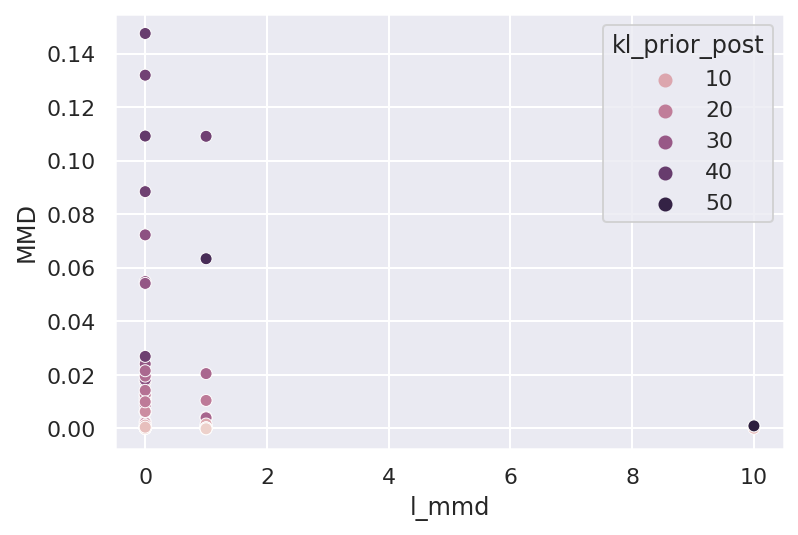

In [16]:
data = results_df[(results_df.phase == "valid") & (results_df.l_mmd < 100)]

sns.scatterplot(
    x="l_mmd", 
    y="MMD", 
    hue="kl_prior_post", 
    data=data) 